In [0]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
X=[]
Y1=[]
for i in range(100):
  X.append(i)
  Y1.append(i*i-7)

In [0]:
Y2=[]
for i in range(100):
  Y2.append(i*2)

In [0]:

innnput = np.column_stack((Y1, Y2))
test = [Y1-Y2 for Y1,Y2 in zip(Y1,Y2)]

In [0]:
innnput = np.array(innnput, dtype="float32")
taargetttttt = np.array(test, dtype="float32")

In [14]:
innnput= np.array(innnput).reshape(100, 2,1)
innnput.shape

(100, 2, 1)

In [15]:
taargetttttt.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(innnput,taargetttttt,test_size=0.2,random_state=4)

In [17]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)            

In [18]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/2000





80/80 [==============================] - 4s 49ms/step - loss: 19513159.2000 - val_loss: 14406042.0000
Epoch 2/2000
80/80 [==============================] - 0s 1ms/step - loss: 19493414.6000 - val_loss: 14400637.0000
Epoch 3/2000
80/80 [==============================] - 0s 1ms/step - loss: 19498764.4000 - val_loss: 14394598.0000
Epoch 4/2000
80/80 [==============================] - 0s 1ms/step - loss: 19477645.2000 - val_loss: 14384939.0000
Epoch 5/2000
80/80 [==============================] - 0s 1ms/step - loss: 19462887.2000 - val_loss: 14379355.0000
Epoch 6/2000
80/80 [==============================] - 0s 1ms/step - loss: 19458838.4000 - val_loss: 14377125.0000
Epoch 7/2000
80/80 [==============================] - 0s 1ms/step - loss: 19442306.4000 - val_loss: 14326075.0000
Epoch 8/2000
80/80 [==============================] - 0

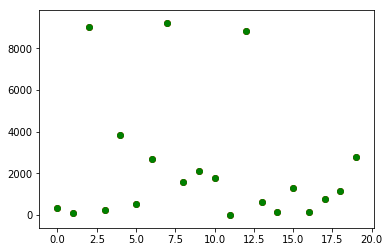

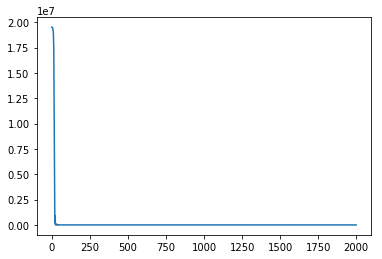

In [19]:
results = model.predict(x_test)
results.shape
y_test.shape
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()
plt.plot(history.history['loss'])
plt.show()